# RNN Models with Python and Tensorflow

In this project I build a recurrent neural network model in Python using TensorFlow/Keras to work with a dataset of phrases for testing if it can remember long phrases.

# Table of Contents
1. Introduction to Recurrent Neural Networks
2. Examples of RNNs Handling Sequential Data
3. The Basics of Backpropagation and the Vanishing Gradient Problem
4. Applying Backpropagation to RNNs
5. How Developers Address This Issue
6. Dataset Explained
7. Preparing Our Dataset
8. Bulding Our RNN Model
9. Evaluating Our RNN Model
10. Visualizing Our RNN Model's Predictions of Generated Text
11. Key Takeaways from Text Generation Using an RNN Model Notebook

## 1. Introduction to Recurrent Neural Networks

**Recurrent Neural Networks** (RNNs in short) are a type of neural network specifically designed for handling sequential data, such as time series, natural language, and similar datasets. RNNs process sequence data by utilizing previous outputs as inputs while maintaining hidden states to capture context over time.

## 2. Examples of RNNs Handling Sequential Data
* Let's assume we have a couple of phrases we want our RNN model to remember. Below we have two phrases we want to feed our model

  "The color of a ripe tomato is ___"

  "The color of the ocean is deep ____"

* I would guess your answer to question one was "red" and to question two was "blue." It’s likely you arrived at these answers effortlessly because our brains excel at identifying missing words in context. We understand the missing word by considering the earlier part of the sentence. Instead of focusing on just one word in isolation, we retain and use the prior information to determine the correct answer.

* A basic RNN would look something like this:
  * **x** represent given inputs.
  * **A** represents its hidden layers with loops in them allowing for them to persist.
  * **h** represents given outputs.

<p align="center">
  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTb3m5CewynfbC65KNbjmOd0D0eQ4iBrNC2ngozN_2Z4i0Iv9-GbC-Hl5RlFmZj2Y9VZy0&usqp=CAU" alt="Image">
</p>



  



* Now when we it comes to unfolding this RNN it would look something like this:

<p align="center">
<img src="https://miro.medium.com/v2/resize:fit:1400/0*c1L9jjcsASagk_Hu.png" alt="Image">
</p>

* The diagram above illustrates sequence data with multiple time steps, where each time step incorporates information from all previous steps. We could take the final output in the diagram and pass it to a simple linear classification layer for word prediction, as shown in the example above. This should give you a basic understanding of how an RNN model processes sequential data.

#3.Fundamentals of Backpropagation and the Vanishing Gradient Problem

Backpropagation is an algorithm designed to detect errors by working backward from the output nodes to the input nodes. In simple terms, it is the process of fine-tuning a neural network's weights to enhance prediction accuracy.

* Here is how a neural network typically works during the backpropagation process:

  1. First, the neural network performs a forward pass and makes a prediction.  
  2. Next, it compares the prediction to the true value using a loss function. The loss function outputs an error value, indicating how poorly the neural network performed, on a scale of 1-10.  
  3. Then, it uses this error value to calculate gradients for each node within the network. These gradients are used to adjust the network’s internal weights, allowing it to learn. Larger gradients lead to bigger weight adjustments.  
  4. Here is where things get tricky. During backpropagation, each node calculates its gradient with respect to the effects of the gradients in the previous layer. If the adjustments in the preceding layer are small, the gradients shrink further as they move backward. This causes the gradient values to get smaller as they are propagated from layer to layer.  
  5. When the gradients become too small, the network struggles to learn effectively.  

* This leads us to the vanishing gradient problem, where gradients become so small that the network fails to learn properly.

* To visualize this concept, here’s an animated gif demonstrating backpropagation:

<p align="center">
<img src="https://machinelearningknowledge.ai/wp-content/uploads/2019/10/Backpropagation.gif" alt="Image">
</p>

#4. Applying Backpropagation to RNNs

Now that you have an understanding of backpropagation and the vanishing gradient problem, let's explore how these concepts apply to RNNs.

  * We can think of each time step as a layer. When applying backpropagation in this context, it is often referred to as "backpropagation through time." Gradients tend to shrink with each time step. Please refer to the model below:

  ![Image](https://cdn-images-1.medium.com/max/1600/1*Ku54qmCryZVBaIc6g8rjGA.gif)

  * The node that is initally last in the diagram will be the very first node backpropagation will take place. As it goes down the list of nodes the gradient will start becoming smaller and smaller, potentially causing the other nodes to fail learn.

#5. How Developers Address This Issue

  * Even though RNNs are useful, they struggle to retain information over long periods of time, often forgetting what should be remembered. They are effective for short-term tasks, though their limitations prompted developers to address this issue, and seek improved solutions. Over time, developers have found more effective ways to address the vanishing gradient problem. The creation of models like LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit) has provided solutions to mitigate the gradient issues inherent in RNNs.

#6. Dataset Observation

  * Our dataset will consist a unique list of simplified of unique phrases that will be used to train our model.

    * **Our Dataset:**

    * `phrases = [
    "oceans are deep blue",
    "tomatoes are ripe red",
    "grass is green",
    "pennies are really shiny",
    "lakes are blue"
]`

#7. Preparing Our Dataset
The array of phrases in our dataset will go through data modifications, to be prepared for our training model.

1. **Concatenating All Phrases into a Single String**

  * We combine all the phrases together, by concatenating or joining the phrases  creating a giant long continuous string.

    * **Output:** "oceans are deep blue tomatos are ripe red grass is green pennies are really shiny lakes are blue"`

2. **Converting the String into a Set of Characters**

  * Once the list of phrases are converted to a single long continuous string, we need to extract these unique characters from this string. This is done by converting the string into a set, removing any duplicates and making sure that each character in the string is represented one time.

  * Known characters in our phrases as a set:

    * **Output:** `{'m', 'n', 'a', ' ', 'u', 'l', 'y', 's', 'h', 'c', 'r', 'k', 'o', 'p', 'i', 'g', 'e', 'd', 'b', 't'}`

3. **Sorting The Characters in Alphabetical Order**
  
  * Once we have a set of unique character, we need to sort these characters in alphabetical order.

    * **Output sorted:** `[' ', 'a', 'b', 'c', 'd', 'e', 'g', 'i', 'l', 'n', 'o', 'p', 'r', 's', 't', 'u', 'y']`


4. **Create a Character-to-Index Mapping**

  * Now that we a have unique list of character, we need to create a character-to-index mapping. This is a dictionary that assigns a unique index to each character in the sorted list of characters.

    * **Output:** `{' ': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'g': 6, 'h': 7, 'i': 8, 'k': 9, 'l': 10, 'm': 11, 'n': 12, 'o': 13, 'p': 14, 'r': 15, 's': 16, 't': 17, 'u': 18, 'y': 19}`

5. **Reverse Mapping**

  * We reverse our character to index mapping where each index points to its corresponding character.
  
    * **Output:** `{0: ' ', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'g', 7: 'h', 8: 'i', 9: 'k', 10: 'l', 11: 'm', 12: 'n', 13: 'o', 14: 'p', 15: 'r', 16: 's', 17: 't', 18: 'u', 19: 'y'}`

6. **Finding the Max Phrase Length**

  * In order to process phrases uniformly, we must find the maximum length of any phrase in the dataset. This value will be used to pad shorter sequence, making sure they all have the same length. We're doing this to ensure our model is using fixed-length inputs. Having the max length ensures none of our data is truncated while regulating input dimensions.

    * **"pennies are really shiny"** has the most characters out of our dataset with a character count of 24.



7. **Converting Phrases to Sequence of Indices**

  * Each phrase in our list is then converted into a list of indicies/points, where each character within the phrase is replaced with its corresponding index from the character-to-index mapping. We do this because numerical representation is important when feeding text data into machine learning models.

  * For example the phrase "oceans are deep blue" will be transformed to:

    * `[13, 3, 5, 1, 12, 16, 0, 1, 15, 5, 0, 4, 5, 5, 14, 0, 2, 10, 18, 5]`

    * `o = 13, c = 3, e = 5, a = 1, n = 12, s = 16, SPACE = 0, a = 1, r = 15, e = 5, SPACE = 0, d = 4, e = 5, e = 5, p = 14, SPACE = 0, b = 2, l = 10, u = 18, e = 5`
  
8. **Padding Sequences to Uniform Length**

   * To ensure phrases are the same length as the max length phrase, the sequences that are short are padded with zeros at the end to ensure all phrases have the same length as the longest phrase

    * The phrase **"pennies are really shiny"** is the longest phrase with the most characters and has 24 characters at max.
   
    * The phrase **"oceans are deep blue"**, with only 20 characters, needs four 0s added at the end to reach the required length of 24 characters.
  
9. **Setting Our X and Y Variable Data**

  * **X** will consist all padded sequntial characters except the last one in each phrase.
  * **y** will consist all padded sequntial characters except the first one in each phrase.
    * **y** data will go through one hot encoding (a method for converting categorical variables into a binary format).

#8. Bulding Our RNN Model.

Our simple RNN model is made up of layers upon layers. Our RNN model is made up of an Embedding Layer, Simple RNN Layer and a Dense Layer.

* **Embedding Layer -**  Purpose is to convert each input character into a dense vector representation of a fixed size of our output dimension (64 in this case).

* **Simple RNN Layer -** Processes the input sequence, step by step, while maintaining a hidden state that gathers information about the sequence.

* **Dense Layer -** Acts as the output layer, providing a probability distribution over the vocabulary for each time step.


#9. Evaluating Our RNN Model:
We evaluate our model by providing a "starting phrase," allowing the model to predict the next possible character iteratively. Using the predict method, the model calculates output probabilities for the next character and selects the most likely one. The input sequence is padded to the required length for the model, and after each prediction, the predicted character's index is appended to the input to generate subsequent characters. This process repeats until the desired length of text is achieved. Once all characters are predicted, the full generated text is compiled and returned.

#10. Visualizing Our RNN Model's Predictions of Generated Text:
 We will use our evaluation method where a sequence of characters are generated by repeatedly predicting the next character based on the current input and appending it to the generated text. Then we visualize the generated sequence by plotting the character points/indices on a scatter plot with connecting lines, and adds a fill between graph to show the flow of predicted generated characters.

#11. Key Takeaways from Text Generation Using an RNN Model Notebook
Let us go over what we learned so far, from this notebook.
1. **Understanding RNNs**
   * Learned what Recurrent Neural Networks (RNNs) are and what kind of data they can handle like phrases or time series data.
   * They process information by using previous outputs as inputs while keeping a memory of past data through hidden states.

2. **Challenges with RNNs**
   * **Backpropagation** allows neural networks to learn by adjusting weight values, but RNNs face the vanishing gradient problem, which makes learning long term data difficult.
   * This kind of problem occurs when gradients shrink too much during the backward pass, hindering the model's capability to remember long term.

3. **Solutions To Combat RNN's Ability To Remember Long Term**
   * Developers overtime came up with advanced machine learning architectures like LSTMs(Long Short Term Memory) and GRU (Gated Recurrent Units) were developed to address these issues by better managing long-term memory.

4. **Preparing Data for RNNs**
   * Phrases were converted into numerical representations.
   * Phrases were padded to the same fixed max length for uniformity.
   * Input data (**X**) excluded the last character, and output data excluded (**Y**) the first character.
   * Labels were converted using one-hot encoding for easier model learning.

5. **Building The RNN Model**
  * Built out the RNN model using Tensorflow/Keras

6. **Evaluating & Visualizing**
  * We evaluated and visualized the model's capability of predicting and generating the next set of characters without any problems. The model successfully learned to predict the next character in phrases demonstrating the RNN's ability to handle sequential patterns

7. **Key Insights**
  * RNNs are capable of short term tasks but struggle with long terms tasks, highlighting the importance as to why developers rely on models like LSTMs, GRUs, or Transformers for tasks involving longer sequences.

**Imports**

Imports for our notebook.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

**Dataset**

Our composed dataset of phrases we will use to train our RNN model with

In [53]:
phrases = [
    "oceans are deep blue",
    "tomatoes are ripe red",
    "grass is green",
    "pennies are really shiny",
    "lakes are blue"
]

**Printing The Length of Each Phrase**

Here, we are looping through each phrase and printing the phrase along with the number of characters that phrase contains.

In [54]:
length_of_chars = [len(phrase) for phrase in phrases]
for phrase, length in zip(phrases, length_of_chars):
    print(f"Text: '{phrase}' | Length: {length}")

Text: 'oceans are deep blue' | Length: 20
Text: 'tomatoes are ripe red' | Length: 21
Text: 'grass is green' | Length: 14
Text: 'pennies are really shiny' | Length: 24
Text: 'lakes are blue' | Length: 14


**Dataset Cleanup: Extracting Unique Characters, Mapping Characters to Indices, and Mapping Indices to Characters**

In this step, we extract the unique characters from our dataset, assign indices to each character, and create a reverse mapping from indices back to characters.

In [55]:
unique_chars = sorted(set("".join(phrases))) #sort, concatenate, and remove duplicates of all phrases in our phrases dataset.
char_to_idx = {char: idx for idx, char in enumerate(unique_chars)} # assigns an index to each character and assigns each unique character to its index.
idx_to_char = {idx: char for char, idx in char_to_idx.items()} # Creates a reverse mapping where each index points its corresponding character.

**Convert Phrases Into A Seuqnce of Integers**

This converts each phrase into a sequence of integers based on character indices, and we apply padding mechanisms to ensure all characters have the same length.

In [56]:
max_len = max(len(phrase) for phrase in phrases)  # gets the max length of each phrase in the dataset
sequences = [[char_to_idx[char] for char in phrase] for phrase in phrases]  # converts each phrase into a sequence into a sequence of indices based on character-to-index mapping. this turns each char in the phrase into its corresponding index.
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post') #pads the sequences to ensure same variable length. if a sequence is less than max length it be will be padded with zeros at the end.

**Preparing Our Inputs (X) and Outputs (y)**

1. X will consist all characters except the last one in each phrase.
2. y will consist all characters except the first one in each phrase. y will go through one hot encoding.


In [57]:
X = padded_sequences[:, :-1] #inputs
y = padded_sequences[:, 1:] #outputs
y = np.array([to_categorical(seq, num_classes=len(unique_chars)) for seq in y]) # one hot encoding

**Building Out the RNN Model**

In [58]:
model = Sequential([
    Embedding(input_dim=len(unique_chars), output_dim=64),
    SimpleRNN(128, return_sequences=True),
    Dense(len(unique_chars), activation='softmax')
])

**Compiling The RNN Model**

In [59]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Training the RNN Model**

We'll train our x and y data for 70 epochs, with a batchsize of 2, and verbose is set to true

In [60]:
model.fit(X, y, epochs=70, batch_size=2, verbose=1)

Epoch 1/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0723 - loss: 2.9847
Epoch 2/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3951 - loss: 2.7475 
Epoch 3/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4201 - loss: 2.3815
Epoch 4/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3978 - loss: 2.1999 
Epoch 5/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4158 - loss: 2.1054 
Epoch 6/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3663 - loss: 2.2635
Epoch 7/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3842 - loss: 2.2220 
Epoch 8/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4011 - loss: 2.2142 
Epoch 9/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5288 - loss: 1.8108
Epoch 10/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5185 - loss: 1.8095 
Epoch 11/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5386 - loss: 1.8364  
Epoch 12/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5136 - loss: 1.7922 


**Evaluating The RNN Model**

We evaluate our model by providing a "starting phrase," allowing the model to predict the next possible character iteratively.

In [61]:
def generate_text(model, start_phrase, length):
    generated = start_phrase #start of the initial phrasing
    current_input = [char_to_idx[char] for char in start_phrase] #convert the starting phrase to a list of indicies based on the character-to-mapping

    for _ in range(length):
        current_input_padded = pad_sequences([current_input], maxlen=max_len - 1, padding='post') #pad all inputs to ensure it has the correct length for the model
        prediction = model.predict(current_input_padded, verbose=0) #Use the model to predict the next character
        next_char_idx = np.argmax(prediction[0, len(current_input) - 1]) #gets the next index of the predicted next character
        next_char = idx_to_char[next_char_idx] # map the predicted index back to the character
        generated += next_char #add the predited character to the generated text
        current_input.append(next_char_idx) #update the current input by adding the predicted character index
        if len(current_input) > max_len - 1: #make sure the input doesn't exceeds the model's input size
            current_input = current_input[1:] #remove the first character index to maintain the correct input length

    return generated[:length] #return the fully generated text


starting_word = "pen" #the first term we'll use to see what the model predicts based on this word.
generated_text = generate_text(model, starting_word, length=24) #use the model to predict the next set of character
print(f"Generated text using the starting word '{starting_word}': {generated_text}") #print our results

Generated text using the starting word 'pen': pennies are really shiny


**Visualizing The RNN Model's Text Prediction**

Here we visualize the model's text prediction of the next character based on the starting phrase or set of characters the user typed out

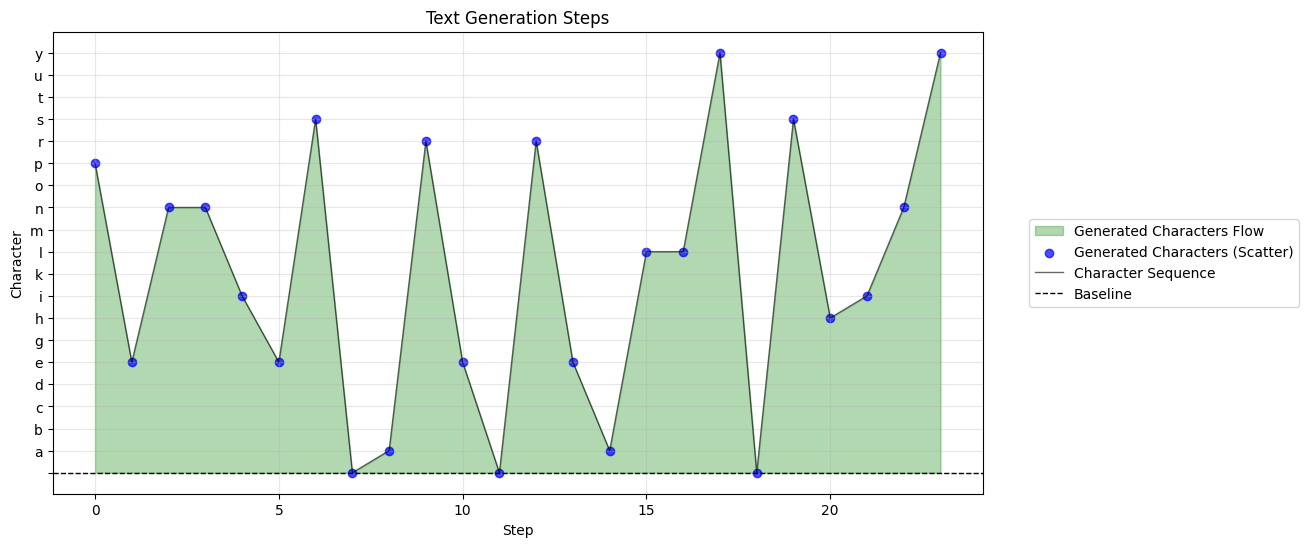

In [62]:
def plot_generated_text(steps, chars):
    char_indices = [char_to_idx[char] for char in chars] #coverts characters to numerical points/indicies for plotting

    plt.figure(figsize=(12, 6)) #plot the results with a fill_between graph with a 12x6 plot.

    plt.fill_between(steps, char_indices, color="green", alpha=0.3, label="Generated Characters Flow") #fill between the generated character values and a baseline (e.g., zero or baseline value)


    plt.scatter(steps, char_indices, color="blue", label="Generated Characters (Scatter)", alpha=0.7) #scatter plot of the characters

    plt.plot(steps, char_indices, color="black", alpha=0.6, linewidth=1, label="Character Sequence") #connects scatter points with black lines.

    plt.axhline(0, color='black', linewidth=1, linestyle="--", label="Baseline") #represents a baseline


    plt.yticks(np.arange(len(char_to_idx)), [char for char, _ in sorted(char_to_idx.items())]) #set y-axis labels to characters

    plt.title("Text Generation Steps") #title of graph
    plt.xlabel("Step") #X axis label
    plt.ylabel("Character") #Y axis label
    plt.grid(alpha=0.3)


    plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0.) #move the legend to the far right

    plt.show()

#test usage
starting_word = "pen"  #the first term we'll use to see what the model predicts based on this word.
generated_text = generate_text(model, starting_word, length=24)  #use the model to predict the next set of characters

#prepare steps and chars for plotting
steps = list(range(len(starting_word))) + list(range(len(starting_word), len(starting_word) + len(generated_text) - len(starting_word)))
chars = list(starting_word) + list(generated_text[len(starting_word):])

plot_generated_text(steps, chars) #plot the generated text